In [7]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os
%matplotlib inline
from sklearn.cluster import KMeans

In [4]:
os.chdir('C:/Personals/GWU/202103_Programming for Analytics II_DNSC_6303_10/Assignmnt4/')

In [8]:
# Reading the "Health_Population.xlsx" file
health_df = pd.read_excel("Health_Population.xlsx" )

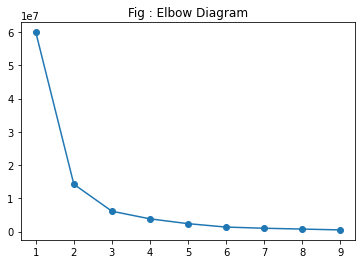

In [9]:
new_health_df = health_df[['Death Rate','Health Expend','Life Exp','Male Mortality','Female Mortality']]
# Plotting Elbow Diagram without Standardizing the data
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( new_health_df )
    cluster_errors.append( clusters.inertia_ )
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" ); # x -> cluster_range, y -> errors
plt.title( "Fig : Elbow Diagram");

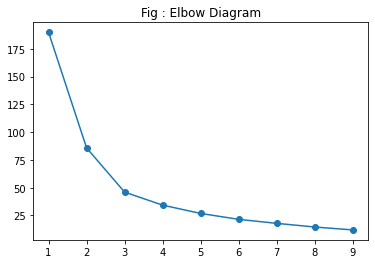

In [12]:
# Task 12: Preprocessing of standardization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
scaled_health_df = scaler.fit_transform( health_df[['Death Rate','Health Expend','Life Exp','Male Mortality','Female Mortality']] )
# scaling the 5 columns to equal platform

cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( scaled_health_df )
    cluster_errors.append( clusters.inertia_ )
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" ); # x -> cluster_range, y -> errors
plt.title( "Fig : Elbow Diagram");

In [13]:
# Now, performing k-means clustering to group the countries into 4 clusters
k = 4
clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_health_df )
health_df["clusterid"] = clusters.labels_
health_df[health_df.clusterid == 0]

,Country Name,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate,GNI,clusterid
4,Cambodia,9.426,17.630712,58.350878,292.208,226.730,2.236057,51.399769,48.600231,12152354,5579215,3.805,28.058,300,0
16,Ghana,10.701,12.266565,56.985098,319.064,279.940,2.465088,49.495196,50.504804,18938762,8233103,4.826,35.446,340,0
17,India,8.692,19.609108,62.593390,250.112,193.149,1.773546,48.196848,51.803152,1053050912,405518817,3.311,26.463,440,0
27,Pakistan,8.728,15.498242,62.758171,202.317,174.339,2.276383,48.404962,51.595038,138523285,41617498,4.580,32.035,490,0


In [14]:
health_df[health_df.clusterid == 1]

,Country Name,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate,GNI,clusterid
1,Austria,9.6,2415.782386,78.126829,126.288,63.086,0.240467,51.465237,48.534763,8011566,3899156,1.360,9.8,26790,1
2,Australia,6.7,1745.925306,79.234146,97.967,56.110,1.192272,50.112224,49.887776,19153000,9603052,1.756,13.0,21130,1
5,Canada,7.1,2099.841455,79.236585,100.968,61.077,0.882999,50.464688,49.535312,30769700,16235329,1.490,10.9,22610,1
10,Denmark,10.9,2612.692686,76.592683,125.852,78.827,0.334234,50.518630,49.481370,5339616,2863219,1.770,12.6,32660,1
13,Finland,9.5,1700.319728,77.465854,143.868,63.000,0.207607,51.183482,48.816518,5176209,2586077,1.730,11.0,26420,1
14,France,8.9,2209.243730,79.056098,138.397,60.836,0.684931,50.973569,49.026431,60912498,27479571,1.890,13.3,25150,1
15,Germany,10.2,2397.753676,77.926829,125.466,63.374,0.135432,51.305025,48.694975,82211508,40252431,1.380,9.3,26210,1
18,Ireland,8.2,1593.343372,76.536585,119.264,70.026,1.333043,50.263356,49.736644,3805174,1775844,1.890,14.4,24100,1
19,Japan,7.7,2838.599244,81.076098,98.200,47.577,0.167276,50.891838,49.108162,126843000,67670439,1.359,9.4,36230,1
20,Italy,9.8,1587.962011,79.778049,101.384,50.696,0.045304,51.481769,48.518231,56942108,23334999,1.260,9.5,21820,1


In [15]:
health_df[health_df.clusterid == 2]

,Country Name,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate,GNI,clusterid
0,Argentina,7.796,706.904994,73.755805,180.641,92.799,1.110875,51.072396,48.927604,37057452,16458321,2.561,19.413,7440,2
3,Brazil,5.994,262.758717,70.016390,247.531,125.460,1.452901,50.582216,49.417784,175287587,79593872,2.300,20.204,3860,2
6,China,6.450,43.626109,71.995585,123.629,91.798,0.787957,48.643896,51.356104,1262645000,734852598,1.497,14.030,940,2
7,Colombia,5.644,146.006666,70.988707,230.093,111.186,1.457656,50.547110,49.452890,40403958,16763699,2.389,20.959,2320,2
9,Croatia,11.200,371.224400,72.807805,174.609,70.950,-2.850973,51.858382,48.141618,4426000,1963073,1.390,9.800,5290,2
11,Ecuador,5.222,49.009471,72.944171,200.974,115.080,1.837286,49.866121,50.133879,12628596,5597173,3.027,24.922,1540,2
21,"Korea, Rep.",5.200,504.904031,75.835366,159.723,61.326,0.836181,49.825577,50.174423,47008111,22810817,1.467,13.300,10740,2
22,Kuwait,2.527,490.548553,73.323707,105.014,70.208,4.675478,41.557463,58.442537,2050741,987618,2.845,22.829,17930,2
24,Mexico,4.655,322.088650,74.299732,166.094,93.231,1.404926,50.347243,49.652757,101719673,40336551,2.716,24.132,5810,2
25,New Zealand,6.910,1056.080267,78.636585,104.305,67.080,0.587564,50.920266,49.079734,3857700,1928883,1.980,14.660,14080,2


In [16]:
health_df[health_df.clusterid == 3]

,Country Name,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate,GNI,clusterid
8,"Congo, Dem. Rep.",15.955,18.159123,50.002878,370.806,317.698,2.533546,50.411344,49.588656,47076387,18517555,6.751,45.964,130,3
12,Ethiopia,14.015,5.368287,51.933829,408.870,365.537,2.892891,50.138279,49.861721,66537331,28995215,6.529,43.714,120,3
31,South Africa,11.624,245.057282,56.368317,493.454,374.819,1.488015,50.926756,49.073244,44896856,15803467,2.829,24.329,3070,3


In [17]:
health_df.groupby(health_df.clusterid).size()

clusterid
0     4
1    17
2    14
3     3
dtype: int64

In [18]:
cluster_1 = health_df[health_df.clusterid == 1]
cluster_1['GNI'].mean()

29296.470588235294